## Gender Prediction by Names

In [1]:
import nltk
import random
from nltk.corpus import names

In [2]:
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\750010524\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [3]:
names.fileids()

['female.txt', 'male.txt']

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [5]:
cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

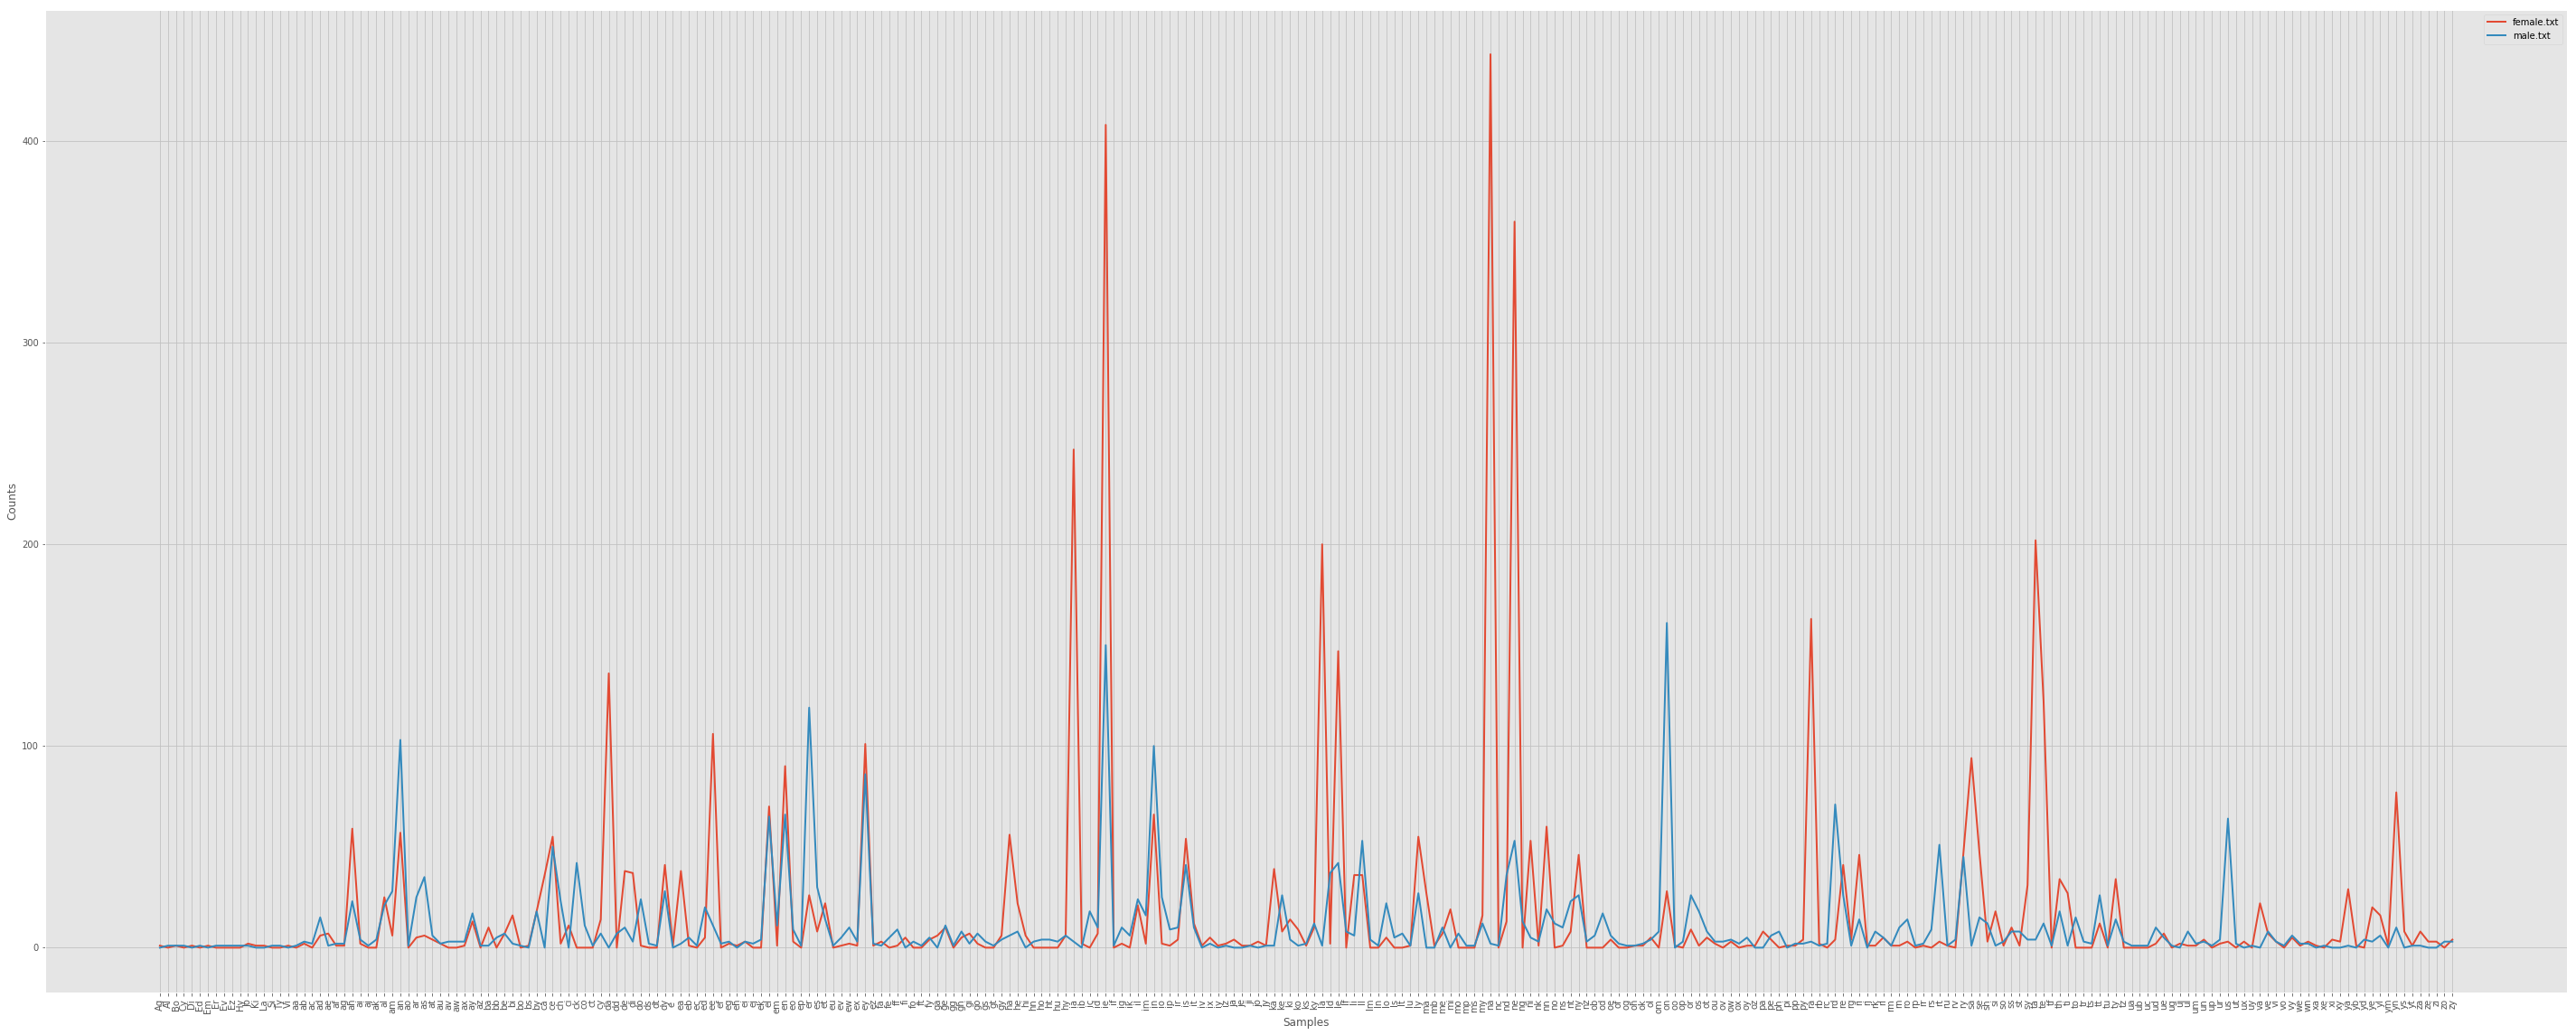

In [6]:
plt.figure(figsize=(50,20))
cfd.plot()

###### Ending letter pairs have tend to lean towords female or male names

In [7]:
def name_feature(name):
    return {'pair': name[-2:] }

In [8]:
name_feature('mallesh')

{'pair': 'sh'}

In [9]:
name_list = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

In [10]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [11]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [12]:
random.shuffle(name_list)

In [13]:
name_list[:10]

[('Mortie', 'male'),
 ('Jeb', 'male'),
 ('Dorothea', 'female'),
 ('Ahmad', 'male'),
 ('Inci', 'female'),
 ('Marieann', 'female'),
 ('Con', 'female'),
 ('Devin', 'male'),
 ('Giovanni', 'male'),
 ('Alphonse', 'male')]

In [14]:
features = [(name_feature(name), gender)  for (name, gender) in name_list]

In [15]:
features[:10]

[({'pair': 'ie'}, 'male'),
 ({'pair': 'eb'}, 'male'),
 ({'pair': 'ea'}, 'female'),
 ({'pair': 'ad'}, 'male'),
 ({'pair': 'ci'}, 'female'),
 ({'pair': 'nn'}, 'female'),
 ({'pair': 'on'}, 'female'),
 ({'pair': 'in'}, 'male'),
 ({'pair': 'ni'}, 'male'),
 ({'pair': 'se'}, 'male')]

In [16]:
len(features)

7944

In [17]:
len(features)/2

3972.0

In [18]:
train_set = features[:3972]
test_set  = features[3972:]

#### use the Naive Bayes Classifier to train the model

In [19]:
clf = nltk.NaiveBayesClassifier.train(train_set)

In [20]:
male_names = names.words('male.txt')

In [21]:
"Samara" in male_names

False

In [22]:
"Clarence" in male_names

True

In [23]:
clf.classify(name_feature("Samara"))

'female'

In [24]:
nltk.classify.accuracy(clf, test_set)

0.7724068479355488